<a href="https://colab.research.google.com/github/valtanenamanda/FAIML_exercises/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('loan_data.csv')

df.info()

df.describe()

df.head()

print("Follwoing is a breakup of credit approval status. 1 means approved credit, 0 means not approved.")
print(df['credit.policy'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
Follwoing is a breakup of credit approval status. 1 means appro

Text(0.5, 0, 'FICO score')

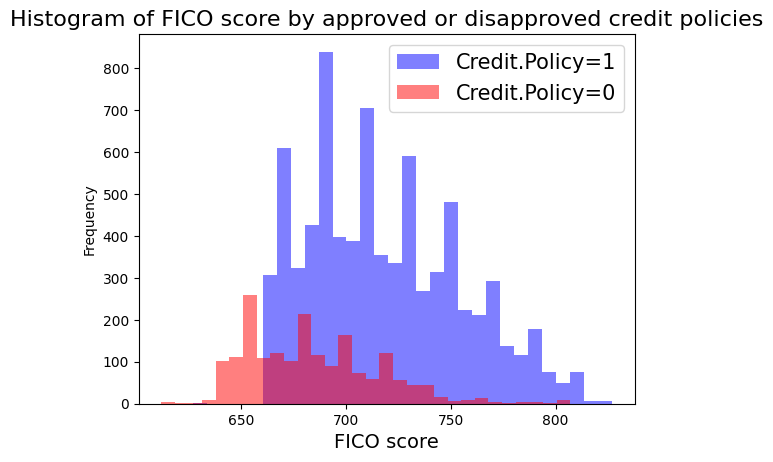

In [ ]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue', label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5, color='red', label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title ("Histogram of FICO score by approved or disapproved credit policies", fontsize=16)
plt.xlabel("FICO score", fontsize=14)





Text(0, 0.5, 'Interest rate')

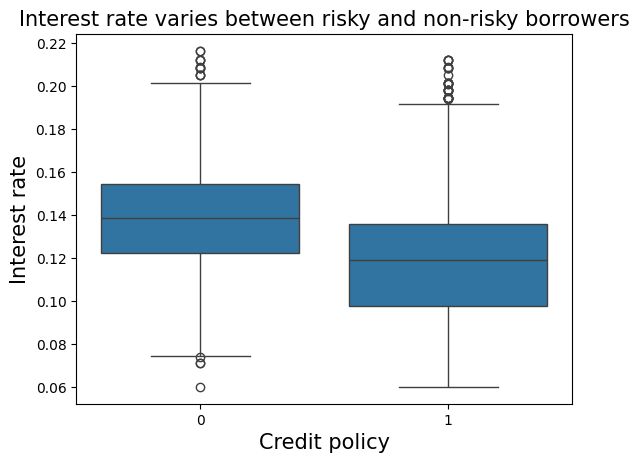

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

Text(0, 0.5, 'Log. annual income')

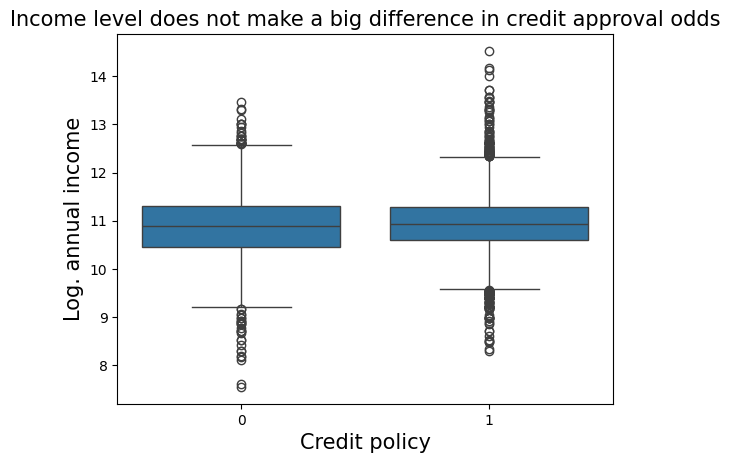

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['log.annual.inc'])
plt.title("Income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Log. annual income",fontsize=15)



Text(0, 0.5, 'Days with credit line')

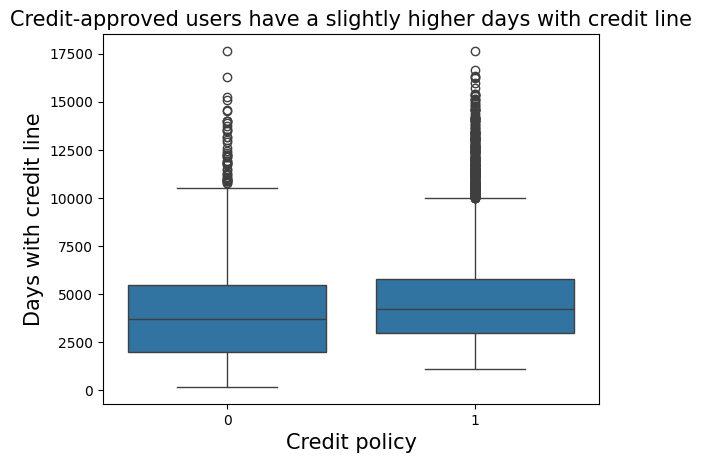

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['days.with.cr.line'])
plt.title("Credit-approved users have a slightly higher days with credit line", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)



Text(0, 0.5, 'Debt-to-income ratio')

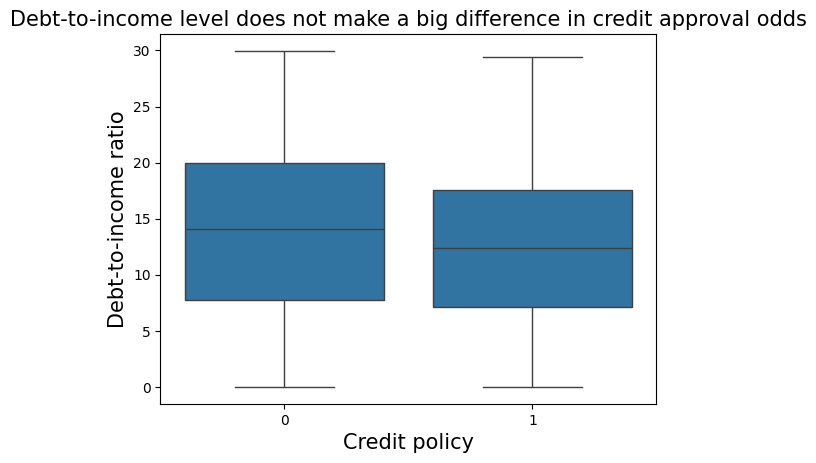

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['dti'])
plt.title("Debt-to-income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Debt-to-income ratio",fontsize=15)

Text(0.5, 0, 'Purpose')

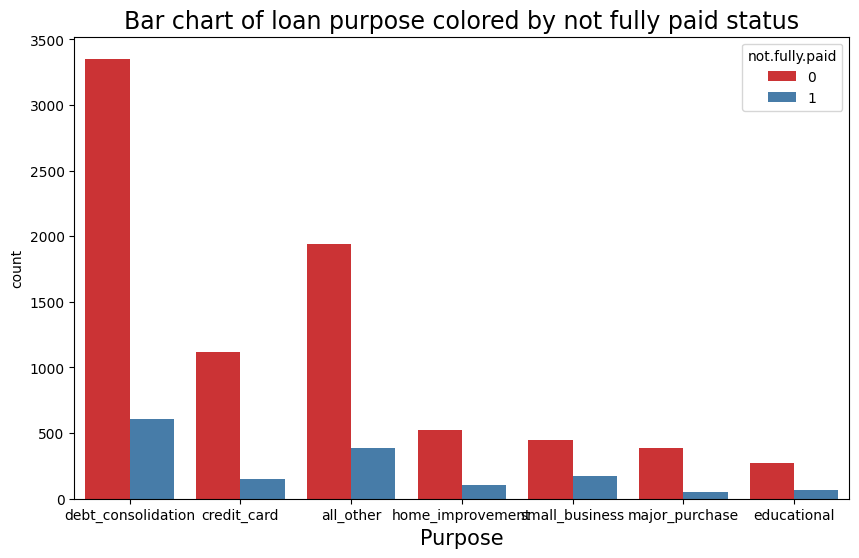

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

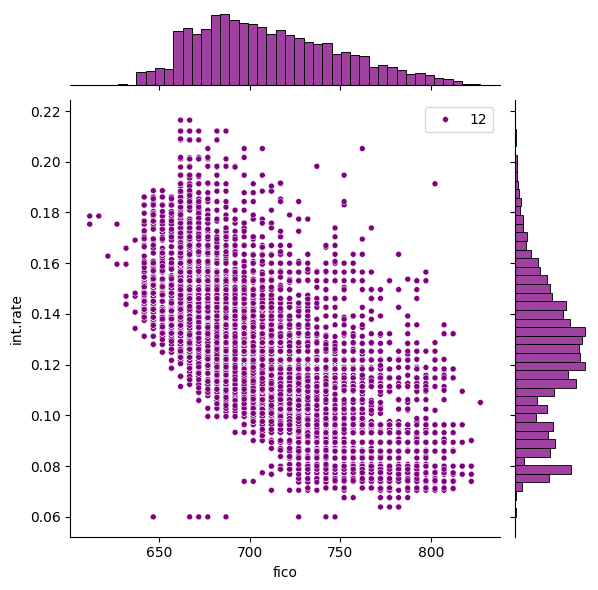

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=df, color='purple', size=12)

<Figure size 1400x700 with 0 Axes>

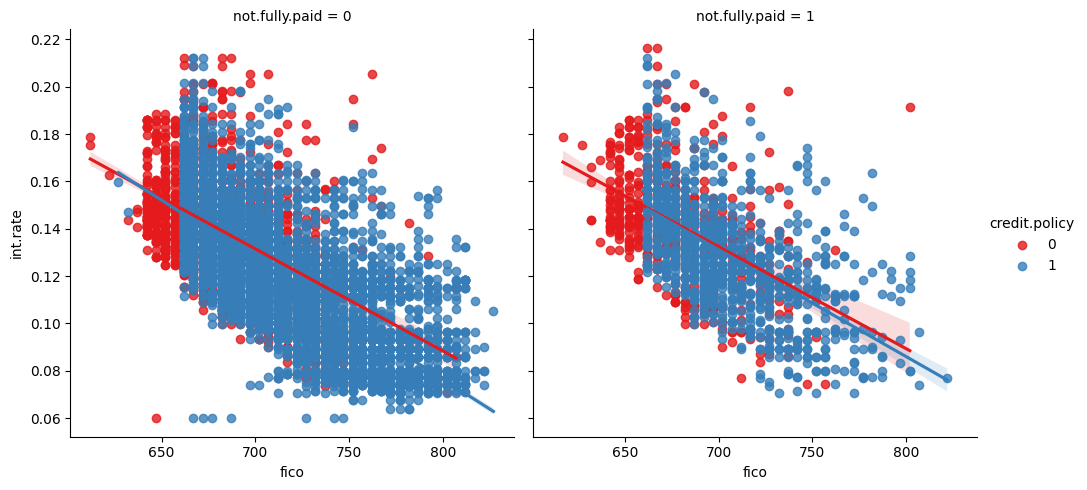

In [ ]:
plt.figure(figsize=(14,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [ ]:
df_final = pd.get_dummies(df,['purpose'],drop_first=True)

df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,True,False,False,False,False,False


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2413
           1       0.22      0.25      0.23       461

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.75      2874

[[2013  400]
 [ 348  113]]
Accuracy of prediction: 0.74


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
cr = classification_report(y_test,predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2413
           1       0.22      0.25      0.23       461

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.75      2874



In [ ]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)

[[2406    7]
 [ 453    8]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Lista tallentamaan tuloksia
results_unlimited_depth = []

# Silmukka kasvavalle puumäärälle
for n_trees in range(10, 110, 10):  # Puumäärä: 10, 20, ..., 100
    rfc = RandomForestClassifier(n_estimators=n_trees, criterion='gini', max_depth=None)
    rfc.fit(X_train, y_train)
    predictions = rfc.predict(X_test)

    # Lasketaan ja tallennetaan tarkkuus
    cm = confusion_matrix(y_test, predictions)
    accuracy = round((cm[0, 0] + cm[1, 1]) / cm.sum(), 3)
    results_unlimited_depth.append((n_trees, accuracy))

# Tulostetaan tulokset
for n_trees, acc in results_unlimited_depth:
    print(f"Number of Trees: {n_trees}, Accuracy: {acc}")



Number of Trees: 10, Accuracy: 0.831
Number of Trees: 20, Accuracy: 0.834
Number of Trees: 30, Accuracy: 0.836
Number of Trees: 40, Accuracy: 0.838
Number of Trees: 50, Accuracy: 0.837
Number of Trees: 60, Accuracy: 0.835
Number of Trees: 70, Accuracy: 0.837
Number of Trees: 80, Accuracy: 0.836
Number of Trees: 90, Accuracy: 0.839
Number of Trees: 100, Accuracy: 0.836


In [ ]:
# Lista tallentamaan tuloksia
results_max_depth_5 = []

# Silmukka kasvavalle puumäärälle
for n_trees in range(10, 110, 10):  # Puumäärä: 10, 20, ..., 100
    rfc = RandomForestClassifier(n_estimators=n_trees, criterion='gini', max_depth=5)
    rfc.fit(X_train, y_train)
    predictions = rfc.predict(X_test)

    # Lasketaan ja tallennetaan tarkkuus
    cm = confusion_matrix(y_test, predictions)
    accuracy = round((cm[0, 0] + cm[1, 1]) / cm.sum(), 3)
    results_max_depth_5.append((n_trees, accuracy))

# Tulostetaan tulokset
for n_trees, acc in results_max_depth_5:
    print(f"Number of Trees: {n_trees}, Accuracy: {acc}")



Number of Trees: 10, Accuracy: 0.838
Number of Trees: 20, Accuracy: 0.838
Number of Trees: 30, Accuracy: 0.838
Number of Trees: 40, Accuracy: 0.838
Number of Trees: 50, Accuracy: 0.838
Number of Trees: 60, Accuracy: 0.838
Number of Trees: 70, Accuracy: 0.838
Number of Trees: 80, Accuracy: 0.838
Number of Trees: 90, Accuracy: 0.838
Number of Trees: 100, Accuracy: 0.838
